In [2]:
%matplotlib notebook
%matplotlib inline

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
import os
import csv

In [2]:
##CLEAN UP FIRST FILE
#get and read the csv file
season_data = 'resources/Seasons_Stats.csv'
season_df = pd.read_csv(season_data)
#remove the unecessary column 'Unnamed:0'
season_df.drop('Unnamed: 0', axis=1, inplace=True)
season_df = season_df.rename(columns={'Player':'name'})


In [3]:
#remove years that is less that 1982
after_82 = season_df.loc[(season_df['Year'] >= 1982.0)]
#select only position C
after_82_C =after_82.loc[after_82['Pos'] == 'C'] 


In [4]:
##CLEAN UP 2ND FILE
#load the files
playdata_data_to_load = "resources/player_data.csv"
#read the dataframes
playdata_data = pd.read_csv(playdata_data_to_load)
playdata_data = playdata_data.set_index(['name'])
# playdata_data = playdata_data["height"].replace({"-":"."}, regex=True) 
print (playdata_data.columns)

Index(['year_start', 'year_end', 'position', 'height', 'weight', 'birth_date',
       'college'],
      dtype='object')


In [5]:
##merge the height and weight of players from playdata_data to after_82_C
#print the columns and see what i should rename to be able to tie the data 
season_df1 = pd.merge(after_82_C, playdata_data, how="left", on=["name", "name"])
season_df1.head()

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TOV,PF,PTS,year_start,year_end,position,height,weight,birth_date,college
0,1982.0,Kareem Abdul-Jabbar*,C,34.0,LAL,76.0,76.0,2677.0,23.4,0.608,...,230.0,224.0,1818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982.0,Alvan Adams,C,27.0,PHO,79.0,75.0,2393.0,18.6,0.529,...,196.0,269.0,1196.0,1976.0,1988.0,C-F,6-9,210.0,"July 19, 1954",University of Oklahoma
2,1982.0,Dennis Awtrey,C,33.0,POR,10.0,3.0,121.0,1.6,0.396,...,6.0,28.0,15.0,1971.0,1982.0,C,6-10,235.0,"February 22, 1948",Santa Clara University
3,1982.0,Carl Bailey,C,23.0,POR,1.0,0.0,7.0,-6.8,1.000,...,2.0,2.0,2.0,1982.0,1982.0,C,7-0,210.0,"April 23, 1958",Tuskegee University
4,1982.0,Kent Benson,C,27.0,DET,75.0,72.0,2467.0,14.4,0.539,...,160.0,214.0,940.0,1978.0,1988.0,C,6-10,235.0,"December 27, 1954",Indiana University


In [6]:
#changethe dash in height to period
season_df1['height'] = season_df1['height'].str.replace('-', '.')
season_df1['height'].apply(type)

0       <class 'float'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
             ...       
3671      <class 'str'>
3672      <class 'str'>
3673      <class 'str'>
3674      <class 'str'>
3675      <class 'str'>
Name: height, Length: 3676, dtype: object

In [7]:
#change height type to float to be able to calculate properly
season_df1['height'] = season_df1['height'].astype('float')
season_df1['height'].unique

<bound method Series.unique of 0       NaN
1       6.9
2       6.1
3       7.0
4       6.1
       ... 
3671    6.8
3672    7.0
3673    7.0
3674    7.0
3675    7.1
Name: height, Length: 3676, dtype: float64>

In [49]:
season_df2 = season_df1[['Age', 'height', 'weight','3P','2P','FT','PTS']].copy()
season_df2

,Age,height,weight,3P,2P,FT,PTS
0,34.0,NaN,NaN,0.0,753.0,312.0,1818.0
1,27.0,6.9,210.0,0.0,507.0,182.0,1196.0
2,33.0,6.1,235.0,0.0,5.0,5.0,15.0
3,23.0,7.0,210.0,0.0,1.0,0.0,2.0
4,27.0,6.1,235.0,3.0,402.0,127.0,940.0
...,...,...,...,...,...,...,...
3671,24.0,6.8,260.0,0.0,138.0,70.0,346.0
3672,26.0,7.0,231.0,0.0,55.0,36.0,146.0
3673,27.0,7.0,253.0,0.0,78.0,22.0,178.0
3674,20.0,7.0,240.0,0.0,10.0,3.0,23.0


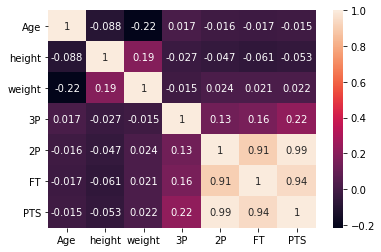

In [50]:
corrMatrix = season_df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
#too many data

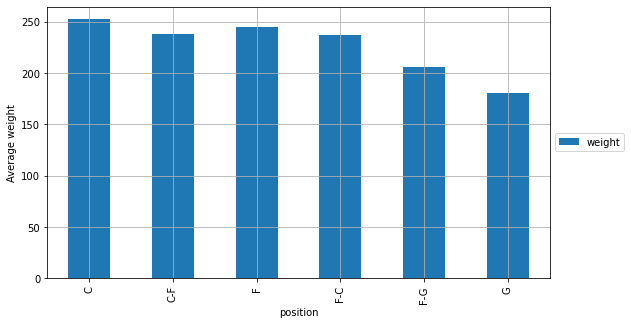

<Figure size 432x288 with 0 Axes>

In [17]:
#check the graph for position change in weight
grouped_df = season_df1.groupby(['position'])
avg_df = grouped_df[["weight"]].mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(avg_df))
tick_locations = [value for value in x_axis]
#Plot and format the bar chart
multi_plot = avg_df.plot(kind="bar", figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Provide the title and labels of x and y axis

plt.xlabel("position")
plt.ylabel("Average weight")

plt.grid()
plt.show()
plt.tight_layout()

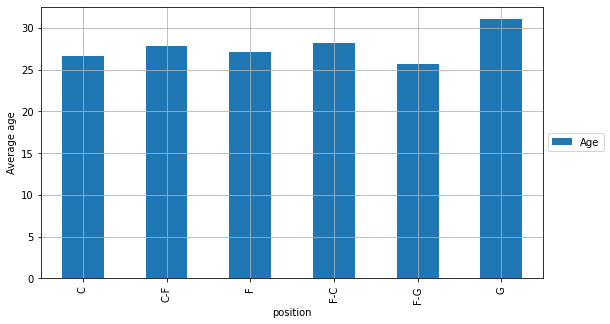

<Figure size 432x288 with 0 Axes>

In [20]:
#check the graph for position change in age
grouped_df = season_df1.groupby(['position'])
avg_df = grouped_df[["Age"]].mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(avg_df))
tick_locations = [value for value in x_axis]
#Plot and format the bar chart
multi_plot = avg_df.plot(kind="bar", figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Provide the title and labels of x and y axis

plt.xlabel("position")
plt.ylabel("Average age")

plt.grid()
plt.show()
plt.tight_layout()

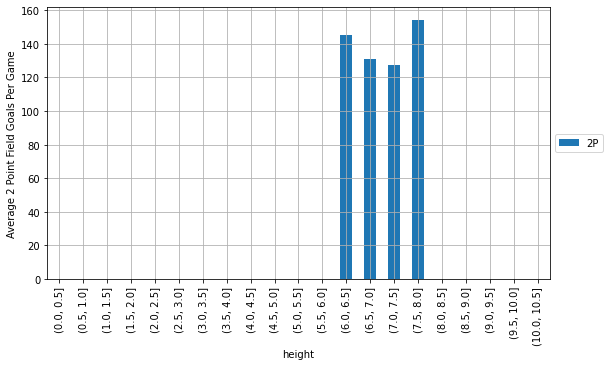

<Figure size 432x288 with 0 Axes>

In [45]:
#create bins for height and compare it to points, 
season_df1['bins']=pd.cut(season_df1['height'], np.arange(0,11,0.5))
      
grouped_df = season_df1.groupby(['bins'])
avg_df = grouped_df[["2P"]].mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(avg_df))
tick_locations = [value for value in x_axis]
#Plot and format the bar chart
multi_plot = avg_df.plot(kind="bar",figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Provide the title and labels of x and y axis

plt.xlabel("height")
plt.ylabel("Average 2 Point Field Goals Per Game")

plt.grid()
plt.show()
plt.tight_layout()


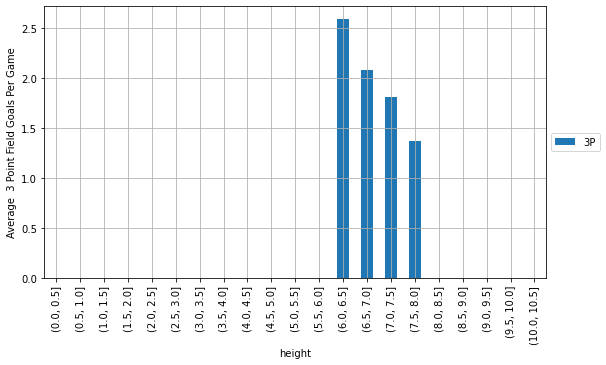

<Figure size 432x288 with 0 Axes>

In [44]:
#create bins for height and compare it to points, 
season_df1['bins']=pd.cut(season_df1['height'], np.arange(0,11,0.5))
      
grouped_df = season_df1.groupby(['bins'])
avg_df = grouped_df[["3P"]].mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(avg_df))
tick_locations = [value for value in x_axis]
#Plot and format the bar chart
multi_plot = avg_df.plot(kind="bar",figsize=(9,5),align="center")
multi_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#Provide the title and labels of x and y axis

plt.xlabel("height")
plt.ylabel("Average  3 Point Field Goals Per Game")

plt.grid()
plt.show()
plt.tight_layout()


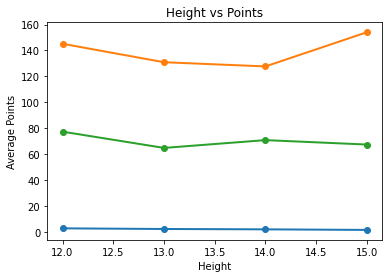

In [55]:
##Four of the most promising height
season_df1['bins']=pd.cut(season_df1['height'], np.arange(0,11,0.5))
      
grouped_df = season_df1.groupby(['bins'])
criteria_df = grouped_df[["3P", "2P", "FT"]].mean()

#Declare the x axis and the tick locations
x_axis = np.arange(len(criteria_df))
tick_locations = [value for value in x_axis]
# Generate a line plot of height vs points

plt.title('Height vs Points')
plt.plot(criteria_df,linewidth=2, marker="o")
plt.xlabel('Height')
plt.ylabel('Average Points')

plt.savefig('linechart')
plt.show()

In [ ]:
# player_data = 'player_data.csv'
# player_data = pd.read_csv(player_data)
# player_data
# player_data['name']

# player_data = player_data.rename(columns={'name': 'Player'})
# player_data

# players = 'Players.csv'
# players = pd.read_csv(players)

# # sorting by first name 
# # complete_player_data.sort_values("Player", inplace = True) 
  
# # dropping ALL duplicte values 
# complete_player_df.drop_duplicates(subset ="Player", 
#                      keep = False, inplace = True) 
  
# # displaying data 
# complete_player_data
#height analysis
# season_df2=season_df2.dropna(subset=['height'])
# season_df2 = season_df2.set_index(['name'])
#drop the year and get the average of data
# season_df2 = season_df2.drop(columns=['Year'])
# season_df2 = season_df2.mean
# print (season_df2.columns)
# Bin4 = season_df1.groupby(['height']).get_group(7.00, )
# bins = [0, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10]
